TASK 1: Factorial Algorithm
==

Takes in a positive integer n, outputs the integer factorial
of n.

**Iterative psuedocode**
<br>

```lua
function factorial (n: positive integer)

    if n < 2
        return 1
    end if

    result = 1
    
    for i in [1, 2, ..., n]
        result = result * i
    end for
    
    return result
    
end function
```

**Recursive Pseudocode**

```lua
function factorial (n: positive integer)

    if n < 2
        return 1
    else
        return n * factorial(n - 1)
    end if
    
end function
```

**Tail Recursive Pseudocode**

```lua
function factorial (n: positive integer)

    return factorial_inner(n, 1)
    
end function

function factorial_inner (n, total)

    if n < 2
        return total
    else
        return factorial_inner(n - 1, total * n)
    end if
    
end function
```

TASK 2: Factorial Implementations
==

Iterative implementation:

In [1]:
def iterative_factorial(n):
    
    if n < 2:
        return 1
    
    result = 1
    for i in range(1, n + 1):
        result *= i
        
    return result

Recursive implementation:

In [2]:
def recursive_factorial(n):
    
    if n < 2:
        return 1
    
    return n * recursive_factorial(n-1)

Tail recursive implementation:

In [3]:
def tail_factorial(n):
    
    if n < 2:
        return 1
    
    return tail_factorial_inner(n, 1)

def tail_factorial_inner(n, total):
    
    if n < 2:
        return total
    
    total *= n
    return tail_factorial_inner(n - 1, total)

A quick test of each on the first few values of n.

In [4]:
x = [0,1,2,3,4,5,6,7,8,9]

functions = [
    iterative_factorial,
    recursive_factorial,
    tail_factorial
]

for f in functions:
    print(list(map(f, x)))

# Expected: [1,1,2,6,24,120,720]

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]
[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]
[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


Timing Code
--

Some of the code in this notebook take a long time to run, so I'm defining a few functions for displaying progress below.

In [5]:
from IPython.display import display, update_display, Markdown

progress_name = None
progress_total = None


def start_progress(name, total):

    global progress_name, progress_total
    progress_name = name
    progress_total = total
    
    update_progress(0, init=True)


def update_progress(current, init = False):

    percentage = int(100 * current / progress_total)
    message = f"{progress_name}: {percentage}% complete"

    action = display if init else update_display
    action(Markdown(message), display_id=f"progress_{progress_name}")
    

Aside on Timing Methods
--

The "my_time" function in the cell below is the main timing function used in this notebook. I could have just used python's timeit method, but I was interested in keeping flexibility for the sake of experimentation.

One thing that interested me in particular was timeit's use of the minimum rather than the mean time across iterations as the result. This seemed counter-intuitive to me at first, but there are interesting discussions to be found in the links below:

https://bugs.python.org/issue28240<br>
https://blog.kevmod.com/2016/06/benchmarking-minimum-vs-average/

After reading there a little, it makes more sense. The idea is that the time recorded will almost always be greater than or equal than the idea time taken to execute the function, since various other things are happening at the same time. In other words, the error is almost always positive. In light of this, the mean is an overestimate, and the min approaches the true value as the number of iterations increases.

That being said, it has been my experimence in this assignment that the number of iterations needed to get the minimum to converge to the ideal value can be very very large - around 100,000 for the search functions later in the notebook. (The default for timeit is 1,000,000!). Until a certain threshold is reached, the results tend to be fairly chaotic. The mean may be an overestimate, but it seems more stable for a small number of iterations, and it is the shape that matters in the end rather than the absolute value. For that reason, I defaulted to it when timing the factorial function. (And this is where having the flexibility below came in useful)

With the binary search timings in section 4, I ended up using the default min behaviour and a large number of iterations.

In [6]:
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np


def my_time(f, *args, number=100000, reduction=min, selector=None):
    
    if selector is not None:
        # Allow an optional transformation to be applied to the arguments
        # This comes in useful later.
        args = selector(*args)
    
    last_time = time.perf_counter()
    timings = list()
    
    for i in range(number):
        
        f(*args)
        
        current_time = time.perf_counter() - last_time
        last_time = time.perf_counter()
        
        timings.append(current_time)
        
    # The reduction function can be customized here. It
    # will usually be the average, or the minimum, of the timings.
    return reduction(timings)


def record_results(data, f, name):
    
    name = f"{name} results"
    start_progress(name, len(data.index))
    
    results = list()
    for i, n in enumerate(data.index): 
        results.append(f(n))
        update_progress(i+1)
    
    data[name] = results

    
def record_timings(data, f, name, **kwargs):
   
    name = f"{name} timing"
    start_progress(name, len(data.index))
    
    times = list()
    for i, n in enumerate(data.index):
        times.append(my_time(f, n, **kwargs))
        update_progress(i+1)
        
    data[name] = times

Record timings for the three factorial implementations. This can take quite a while to run, depending on the max value for n and the number of iterations chosen.

In [133]:
import numpy as np

# Recursion errors seem to kick in at
# n = 2963 my computer. n = 1000 seems safe.

N = np.linspace(1, 1000, 100).astype(int)
factorial_data = pd.DataFrame(index=N)

items = [
    [iterative_factorial, "Iterative"],
    [recursive_factorial, "Recursive"],
    [tail_factorial, "Tail Recursive"],    
]

for function, name in items:
    record_timings(factorial_data, function, name, number=100, reduction=np.mean)

Iterative timing: 100% complete

Recursive timing: 100% complete

Tail Recursive timing: 100% complete

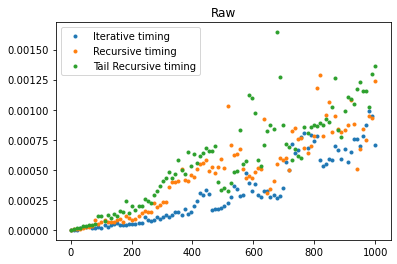

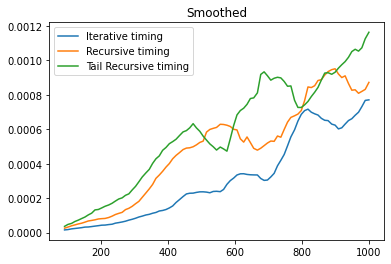

In [267]:
data.plot(style=".", title="Raw")
plt.savefig("factorial_raw.png")

data.rolling(window=(len(N)//10)).mean().plot(title="Smoothed")
plt.savefig("factorial_smooth.png")

The results very wildly in many respects.

The base expectation that the iterative method is faster tends to hold in most cases.

The details are not what I expected though. The performance gap is quite small, mostly for one. And for another, there tend to be huge spikes in time taken during brief intervals. This can be for the interative version, or the recursive version, or both, and the location and magnitude can vary.

The functions looks like it behaves more like a quadratic than a straight line at times. This might not be unexpected, since the O(n) time complexity is a statement about its asymptotic behaviour only, but while I'm not sure what constitutes as large n, I'd have thought 1000 was well enough.

(That fact that I'm using the mean rather than the min could be contributing here though - it likely adds an illusionary extra fixed running time by virtue of being an overestimate)

As an aside, I was interested if the non-linear looking relationship extends to another order of magnitude. This is impossible to compute with the recursive versions, but the iterative version can do it.

This takes a few minutes to run though, which is why I've commented it out below for now. The result very much looks like a quadratic.

At first I thought it might be a sign of python struggling to deal with large numbers, but after reading up on it a little I dismissed that - basic operations on long integers become heaver with every 30 bits of information (or something like that), doesn't seem remotely fast enough to explain this.

https://www.codementor.io/@arpitbhayani/how-python-implements-super-long-integers-12icwon5vk

Iterative timing: 100% complete

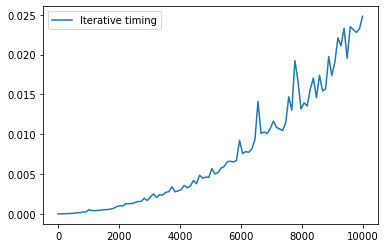

In [278]:
N = np.linspace(1, 10000, 100).astype(int)
ho_factorial_data = pd.DataFrame(index=N)

record_timings(ho_factorial_data, iterative_factorial, "Iterative")
ho_factorial_data.plot()

# This isn't working here for some reason - the png is
# empty. It's working for the other graphs, and this is just an aside
# so I'm letting it be.
# plt.savefig("factorial_higher_order.png")

Task 3: Binary Search Implementation
==

As an aside, an iterative algorithm is as follows:

**Inputs**
   - array: a sorted sequence of integers
   - target: the integer to search for
    
**Outputs**
   - The index of the target in the array, if the target is in the array. 
   - Else, -1.
    
Note: If the target occurs in array multiple times,
there is no given guarantee as to which valid index
is returned. In particular, it will not always simply be the
index of the first occurance.

```lua
function binary_search(array, target)
    
    if length(array) == 0
        
        return -1
    
    end if
    
    a = 0
    b = length(array)
    
    while True
    
        m = floor((a + b) / 2)
    
        if array[m] > target
            
            b = m
        
        else 
        
            a = m
        
        end if
                
        if a == target
        
            return a
            
        else if b - a < 2
                
            return -1
                
        end if
    
end function 
```

Iterative implementation:

In [38]:
def iterative_search(array, target):
    
    if len(array) == 0:
        return -1
    
    a = 0
    b = len(array)
    
    while True:
        
        m = (a+b)//2
        
        if array[m] > target:
            b = m
        else:
            a = m
            
        if a == target:
            return a
        elif (b - a) < 2:
            return -1 

Recursive implementation:

In [145]:
def recursive_search(array, target):
    
    if len(array) == 0:
        return -1
    
    if array[0] == target:
        return 0
    
    if len(array) == 1:  
        return -1
    
    start = 0
    end = len(array)
    m = len(array) // 2
    
    if array[m] > target:
        end = m
    else:
        start = m
    
    result = recursive_search(array[start:end], target)
    if result != -1:
        result += start
    
    return result

Tail recursive implementation:

In [146]:
def tail_recursive_search(array, target):
    
    if len(array) == 0:
        return -1
    
    return recursive_search_inner(array, target, 0, len(array))
            

def tail_recursive_search_inner(array, target, start, end):
    
    if array[start] == target:
        return start
    
    if end - start == 1:  
        return -1
    
    m = (start + end) // 2
    
    if array[m] > target:
        end = m
    else:
        start = m
        
    return recursive_search_inner(array, target, start, end)

Some simple tests.

In [147]:
def test_search(f):

    for n in [10, 25, 0]:
    
        X = list(range(n))

        # Search for each value in the list.
        for i in X:
            print(f(X, i), end=", ")
        
        # Search for a value that definitely won't exist.
        print(f(X, 1.5))


test_search(iterative_search)
test_search(recursive_search)
test_search(tail_recursive_search)

# Expected:
# 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1
# 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, -1
# -1

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, -1
-1
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, -1
-1
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, -1
-1


TASK 4: Runtime of Binary Searches
==

**Theory**

In both the recursive and iterative cases, the binary search bisects the search domain with each step. At worst case, it does so until the domain has a single element. 

In both cases, as a potential shortcut, the first element of the current search domain is checked directly against the target. If this element matches the target, the search is complete. This means that the search can terminate early, and indeed, no subdividing is needed at all if the first element of the original search domain is the target element!

So:

 - **Best case scenario - O(1)**
 <br>This happens if the element is the first element in the array, for example.
 <br>The shortcut applies immediately.


 - **Worst case scenario - O(log(N))**
 <br>This happens if the element is the *second* element in the array, for example.
 <br>The shortcut never applies, since in this specific case, the first element in the original search domain remains the first element in each subdomain. The second element is never checked by the shortcut.

**Practice: Worst Case Scenario**

The times proved more chaotic with the searches compared to the factorials (which makes sense, since they grow exponentially slower). I had a lot of difficulty getting timings that weren't all over the place, and ended up using a high number of interations and samples.

In [217]:
def record_search_timings(data, f, name, index=1):

    def select_slice(n):
        return [data["Factorial results"].values[0:n]]

    def search(array):
        f(array, array[index]) # The second value should yield the worst case

    record_timings(data, search, name, 
        number=n_iterations,selector=select_slice, reduction=min)

I've commented out the function below because it takes something like 30mins to run. If you wish to run this yourself, setting `n_iterations` to something like 100 will have it run in a second or so.

In [241]:
def get_search_timings():
    
    n_iterations = 100000

    N = list(range(2, 2001))
    search_data = pd.DataFrame(index=N)
    record_results(search_data, iterative_factorial, "Factorial")

    record_search_timings(search_data, iterative_search, "Iterative")
    record_search_timings(search_data, recursive_search, "Recursive")
    record_search_timings(search_data, tail_recursive_search, "Tail")
    return search_data.drop("Factorial results", axis=1)

#search_data = get_search_timings()

The data is plotted in the next cell, and some observations are given below.


**Steps**

The log_2 curve is clearly visible, and best of all, there are steps visible. 

Especially for non-tail recursion, in the run I have as of writing this.

This is expected behaviour - each level of bisection allows double the search domain to be explored. Put another way, if a search domain requires an extra level of subdividing, another level of subdivinding will not be necessary until a domain with twice the number of elements as the first one is provided. 

Since the time to execute is roughly proportional to the number of subdivisions (in the worst case scenario, at least, and for a large enough input), then the time taken will step along with the subdivisions.

The steps aren't always very definite, but that is not unexpected either, given the amount of noise.


**Tail vs Non-Tail**

Python does not implement full tail recursion - I've read that this is done to preserve stack traces, and so will not be changing any time soon. And yet the tail version of the function below is much much faster than the non-tail version.

I'm not sure why. There are quite a few more operations occuring in the non-tail version, per call, though. For example, the "len" function is called four times, and there is an extra if-statement and an extra addition. Perhaps these things are adding up to make the difference?


**Recursive vs Iterative**

The iterative version does well here, and outperforms the other two stack based version. 

This is what I would hope for, since it doesn't involve lots and lots of calls (and as aforementioned, python doesn't try and optimize the need for stackframes away), but the difference is less prominent in the factorial case. It could be because of the number of iterations used here. Or because the iterative version is actually a little simpler in terms of operations, as well.

**Cycles**

I don't know why this is occuring, but sometimes with lower sampling there looks to be a cyclical nature to the noise layered ontop of the stepped log_2 theory. This doesn't seem to be the case in the graph I've saved below, and might only be an artifact of something else occuring on the computer.


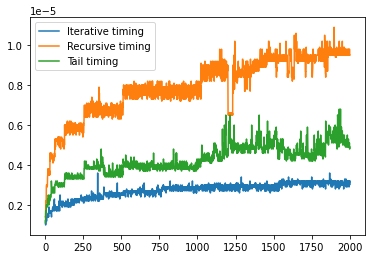

In [272]:
search_data.plot()
plt.savefig("search_worst_case.png")

**Practice: Best Case Scenario**

Plotted below is the best-case scenario for each function. As expected, they run in constant time. 

In fact, the runtime is almost fully constant (as opposed to being O(1), which just means that it doesn't scale with n)

Factorial results: 100% complete

Iterative timing: 100% complete

Recursive timing: 100% complete

Tail timing: 100% complete

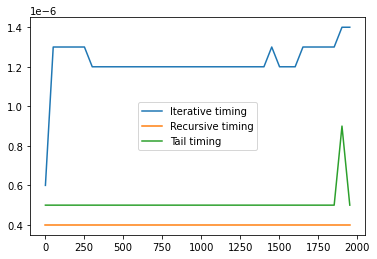

In [273]:
n_iterations = 10000

N = list(range(2,2001, 50))
search_data_best = pd.DataFrame(index=N)
record_results(search_data_best, iterative_factorial, "Factorial")
    
record_search_timings(search_data_best, iterative_search, "Iterative", index=0)
record_search_timings(search_data_best, recursive_search, "Recursive", index=0)
record_search_timings(search_data_best, tail_recursive_search, "Tail", index=0)
search_data_best = search_data_best.drop("Factorial results", axis=1)

search_data_best.plot()
plt.savefig("search_best_case.png")

TASK 5: Curve Fitting
==

Scipy is used to fit curves in this notebook. Functions for nicely displaying curve fitting are defined below:

In [253]:
from scipy.optimize import curve_fit


def fit(df, f, **kwargs):
    
    results = list()
    
    for i, field in enumerate(df.columns):
        params, _ = curve_fit(f, df.index, df[field], **kwargs)
        results.append(params)
        
    param_names = list("abcdefghi")[:f.__code__.co_argcount - 1]
    results = pd.DataFrame(results, index=df.columns, columns = param_names)
    return results
    

def display_fit(df, f, params, ax):

    colors = [line.get_color() for line in ax.lines]
    
    for i, field in enumerate(df.columns):
        
        kwargs = {
            "color": colors[i],
            "label": field + " fit",
            "linestyle": "--",
        }
        
        params_i = params[params.index == field].values[0]
        plt.plot(df.index, f(df.index, *params_i), **kwargs)

First, the factorial functions.

Each of these should run in linear time, theoretically, so a linear function is used to fit.

In practice, the results near 0 are closer to being a very gentle quadratic, centered at 0, with a positive coefficient on x^2. (The time complexity is only asymptotic true) The result is that while the line fits quite well, it does predict impossible negative values for the first few values of n.

Raw


,a,b
Iterative timing,8.157179e-07,-0.000087
Recursive timing,1.118784e-06,-0.000035
Tail Recursive timing,1.283384e-06,-0.000074


Smoothed


,a,b
Iterative timing,8.736446e-07,-0.000132
Recursive timing,1.003027e-06,-0.000037
Tail Recursive timing,1.165042e-06,-0.000016


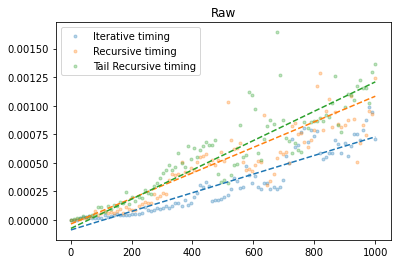

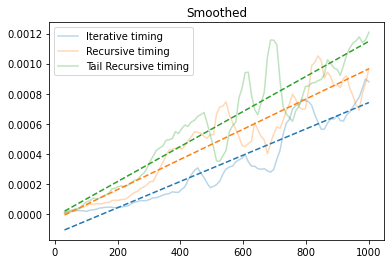

In [275]:
def linear(x, a, b):
    return a*x + b

params = fit(factorial_data, linear)

ax = data.plot(style=".", title="Raw", alpha=0.3)
display_fit(factorial_data, linear, params, ax)
print("Raw")
display(params)
plt.savefig("factorial_raw_fit.png")

smooth = data.rolling(window=(len(N)//10)).mean().dropna()
params = fit(smooth, linear)

ax = smooth.plot(title="Smoothed", alpha=0.3)
display_fit(smooth, linear, params, ax)
print("Smoothed")
display(params)
plt.savefig("factorial_smooth_fit")

Finally, the search functions, worst case. A log curve fits these perfectly, as expected.

It took quite a few runs before I obtained a time series that wasn't dominated by noise and outliers though.

<ipython-input-277-e2c3f326ec2a>:6: RuntimeWarning: invalid value encountered in log2
  return a * np.log2(c*x) + b


,a,b,c
Iterative timing,2.588871e-07,2.370448e-08,1.966841
Recursive timing,9.595063e-07,-3.359878e-06,4.750823
Tail timing,4.498777e-07,-8.707190e-07,3.619805


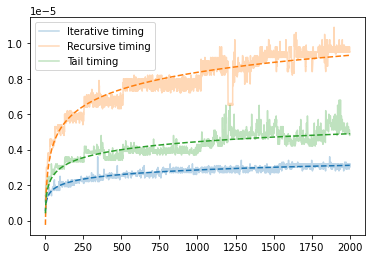

In [277]:
import numpy as np

def log2(x, a, b, c):
    # log, log10 and log2 all work equally well here - a change
    # of base just corresponds to a different "a" coefficient.
    return a * np.log2(c*x) + b

params = fit(search_data, log2)
display(params)

search_data.plot(style="-", alpha=0.3)
display_fit(search_data, log2, params, plt.gca())
plt.savefig("search_fit.png")